#### Homework4
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. You are not allowed to use ChatGPT to answer any of the questions. 

Q1- (10 points) Why Bagged-decision trees and Random Forests are considered "ensemble learning" techniques? Compare these models and fully explain their differences and points they have in common. 

#Why are bagged decision trees/ Random Forest models considered to be ensemble learning.


Bagged decision trees and Random Forests are considered ensemble learning techniques because they combine the predictions of multiple decision trees to improve model performance and reduce overfitting. Both use bootstrapping to train trees on different subsets of the data, but Random Forests add an extra layer of randomness by selecting a random subset of features at each split, which helps reduce correlation between trees. This ensemble approach leads to more stable, accurate, and generalizable predictions compared to a single decision tree.



Q2- (40 points) Complete these questions:
- (30 points) Use the weather dataset provided in the lecture slides, and construct the decision tree until the leaf nodes are homogeneous in terms of the class label "Played". Use Information Gain as your criterion. Provide the comoutations for calculating the Information Gain during the Greedy search method and mathematically justify why a feature is selected at each decision node. 
- (10 points) Provide a visualization of the entire tree. At last, extract 4 decision rules and provide them in your answer. 

Q3- (10 points) What are the differences between Agglomerative Clustering and K-Means Clustering? Fully explain in details in terms of the methodology used. 


Q4- (10 points) Explain how the number of clusters can be determined in K-means clustering? Fully explain the methodology. 

Q5- (20 points) You are given a dataset: vehicles.csv. 

Dataset Columns:
VehicleID: Unique identifier for each vehicle.
EngineSize: Engine size in liters.
Horsepower: Horsepower of the vehicle.
Weight: Weight of the vehicle in pounds.
MPG_City: Miles per gallon in city driving.
MPG_Highway: Miles per gallon on the highway.
Price: Price of the vehicle in dollars.

You are provided with the implementation and results of performing k-means clustering on the vehicles dataset (see below). Based on all the provided results and code, answer the following questions: 
- (5 points) Determine the best number of clusters (i.e., k) by checking the results of elbow method. Explain why you think this is the best number of clusters. Put the correct number of Optimal number of clusters in the code and re-run the code to provide cluster visualization. 
- (3 points) What does the computed Silhouette score determine? 
- (12 points) Fully discuss the results and what they imply about the different groups of vehicles.  Remember, the best number of clusters should provide meaningful clusters. 

In the code below, we import the dataset vehicles.csv into a Pandas DataFrame. We drop the VehicleID column as it is not a relevant feature for clustering. Then we standardize the features to have zero mean and unit variance.

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('vehicles.csv')

# Drop the VehicleID column
df = df.drop('VehicleID', axis=1)

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df)


Here, we use the Elbow Method to determine the optimal number of clusters (k). We plot the results.

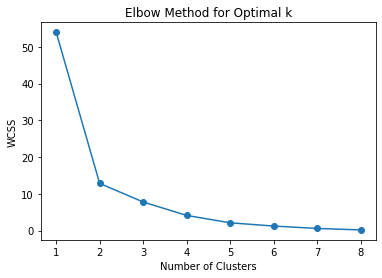

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure()
plt.plot(range(1, 9), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Here, we calculate the silhouette score.

In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(standardized_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Discuss the results


Silhouette Score: 0.4518741264409399


In [19]:
# Optimal number of clusters 
optimal_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels


         EngineSize  Horsepower  Weight   MPG_City  MPG_Highway         Price
Cluster                                                                      
0          3.100000  250.000000  3500.0  18.333333    25.333333  28333.333333
1          1.700000  130.000000  2850.0  27.000000    33.000000  18500.000000
2          4.000000  300.000000  4000.0  15.000000    22.000000  35000.000000
3          2.233333  163.333333  3100.0  23.000000    30.000000  21000.000000


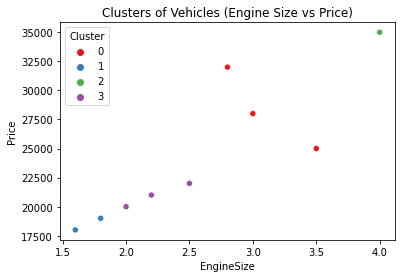

In [20]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
import seaborn as sns

# Scatter plot of EngineSize vs Price, color-coded by cluster
plt.figure()
sns.scatterplot(x='EngineSize', y='Price', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Vehicles (Engine Size vs Price)')
plt.show()


Q6- Explain how eigen values and eigen vectors are computed in Principal Component Analysis. Next, create a numerical example and provide your computations for eigen vectors and eigen values based on the lecture. In your example, assume that there are only 3 input features and 10 observations in your dataset. 

Q7- (15 points) Consider the table of measured data given below:
![Generated Dataset](pic1.png)

The goal is to build a decision tree model to predict the outcome y using the two features $x_1$,$x_2$, where each feature $x_1$,$x_2$ can take one of the three values: a, b, c. 

hint: 
- $log_2 (0.4) = -1.32 $                   
- $log_2 (0.6) = -0.73 $
- $log_2 (0.5) = -1 $                        
- $log_2 (0.75) = -0.41 $
- $log_2 (0.25) = -2 $


Answer the following questions: 

- Compute the entropy of the target variable y (round to 3 decimal places). Include all your assumptions. Entropy(y) = ?
- Compute the information gain for $x_1$ and $x_2$ attributes and show your work. Based on the computed values, indicate which attribute ($x_1$ or $x_2$) should be selected first in the split strategy during model construction. Show your computation and use the provided contingency table below, which is obtained from the information in the dataset in the table above.

![Generated Dataset](cont.jpg)

Q8- (5 points) Explain how Random Forest algorithm controls the number of features to find the best split? 